In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from selenium import webdriver
from bs4 import BeautifulSoup
import re

# 윈도우용 크롬 웹드라이버 실행 경로 (Windows)
executable_path = "chromedriver.exe"

# 크롤링할 사이트 주소를 입력합니다.
source_url = "https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100"

# 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
driver = webdriver.Chrome(executable_path=executable_path)  # for Windows
driver.get(source_url)
req = driver.page_source
soup = BeautifulSoup(req, "html.parser")
cluster_text = soup.find_all(name="div", attrs={"class":"cluster_text"})

# a태그의 href 속성을 리스트로 추출하여, 크롤링 할 페이지 리스트를 생성합니다.
page_url_base = "https://news.naver.com"
page_urls = []
for index in range(0, len(cluster_text)):
    cluster = cluster_text[index]
    news_url = cluster.find(name="a", attrs={"class":"cluster_text_headline nclicks(cls_pol.clsart)"})
    if news_url is not None:
        page_urls.append(news_url.get("href"))

# 중복 url을 제거합니다. # [set : 집합]
page_urls = list(set(page_urls))

# 크롤링에 사용한 브라우저를 종료합니다.
driver.close()

C:\Users\yelin\AppData\Local\Temp\ipykernel_14812\998729991.py:15: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=executable_path)  # for Windows


In [2]:
# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비합니다.
columns = ["title", "content_text"]
df = pd.DataFrame(columns=columns)

# 각 페이지별 '제목', '본문' 정보를 데이터 프레임으로 만듭니다.
for page_url in page_urls:
    
    # 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
    driver = webdriver.Chrome(executable_path=executable_path)  # for Windows
    driver.get(page_url)
    req = driver.page_source
    soup = BeautifulSoup(req, "html.parser")
    
    title_area = soup.find(name="div", attrs={"class":"media_end_head_title"})
    title = title_area.find_all('h2')[0]
    content_paragraphs = soup.find(name="div", attrs={"class":"newsct_article"})
    content_corpus = content_paragraphs.text
    
    # 제목 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
    
    
    # 모든 정보를 하나의 데이터 프레임에 저장합니다.
    row = [row_title, content_corpus]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)
    
    # 크롤링에 사용한 브라우저를 종료합니다.
    driver.close()

C:\Users\yelin\AppData\Local\Temp\ipykernel_14812\3397106868.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=executable_path)  # for Windows
C:\Users\yelin\AppData\Local\Temp\ipykernel_14812\3397106868.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\yelin\AppData\Local\Temp\ipykernel_14812\3397106868.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=executable_path)  # for Windows
C:\Users\yelin\AppData\Local\Temp\ipykernel_14812\3397106868.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\yelin\AppData\Local\Temp\ipykernel_14

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=111.0.5563.110)
Stacktrace:
Backtrace:
	(No symbol) [0x00ABDCE3]
	(No symbol) [0x00A539D1]
	(No symbol) [0x00964DA8]
	(No symbol) [0x0094D0D3]
	(No symbol) [0x009AEA8B]
	(No symbol) [0x009BD093]
	(No symbol) [0x009AACC6]
	(No symbol) [0x00986F68]
	(No symbol) [0x009880CD]
	GetHandleVerifier [0x00D33832+2506274]
	GetHandleVerifier [0x00D69794+2727300]
	GetHandleVerifier [0x00D6E36C+2746716]
	GetHandleVerifier [0x00B66690+617600]
	(No symbol) [0x00A5C712]
	(No symbol) [0x00A61FF8]
	(No symbol) [0x00A620DB]
	(No symbol) [0x00A6C63B]
	BaseThreadInitThunk [0x75FC7D69+25]
	RtlInitializeExceptionChain [0x7784B74B+107]
	RtlClearBits [0x7784B6CF+191]


In [3]:
# 데이터 프레임을 출력합니다.
df.head(5)

,title,content_text
0,김남국 “이재명 기소시점 참 ‘거시기’…尹 호위 잔꾀”,\n\n\n\n\n\n김남국 더불어민주당 의원이 2021년 9월 강원도 한 행사장에...
1,"태영호 “김정은, 4대 세습 준비 중…후계자는 글쎄”",\n\n\n\n\n\n북한은 지난 18∼19일 김정은 국무위원장이 딸 '주애'와 함...
2,대기업 반도체 稅공제 최대 25%…LH·SH 종부세 부담 확 준다,\n\n기사내용 요약반도체·수소 등 국가전략기술 설비투자 세액공제 확대3주택 이상 ...
3,"이재명 기소에 민주당 ""국면전환 정치쇼···지지율 떨어질 때마다 물타기""",\n\n\t\t\t[the300]\n\n\n\n(서울=뉴스1) 안은나 기자 = 이재...
4,"與, 하영제 체포동의안 '가결' 가닥…이재명 압박 카드","\n\n與, 체포동의안 가결 쪽으로 사실상 당론민주당과 다른 모습 보여야 한다는 의..."


In [4]:
# re 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    
    # 한글의 정규표현식을 나타냅니다.
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')    # 한글이 아닌 문자 !!
    # re.sub(컴파일 문장, 대체할 문자, 원문) : 대체 함수
    result = hangul.sub('', text)
    return result
    
print(text_cleaning(df['content_text'][0]))

김남국 더불어민주당 의원이 년 월 강원도 한 행사장에서 이재명 당시 민주당 대선 경선후보를 수행하며 어깨띠를 걸어주고 있다 뉴시스김남국 더불어민주당 의원이 일 이재명 대표에 대한 검찰의 기소를 엉터리 기소라며 반발했다검찰은 이날 이 대표를 대장동위례신도시 특혜 개발 및 성남 불법 후원금 의혹으로 불구속 기소했다김 의원은 페이스북에서 검찰 수사와 관련해 객관적 사실과는 무관하게 처음부터 기소라는 답을 정해놓고 시작한 정치 수사라고 평가절하했다이어 윤석열정부는 임기 내내 정적제거를 위한 수사에만 올인했다며 검찰에서 날고 긴다는 정치검사들이 대거 투입되어 미친 듯이 폭주하듯 수사를 했지만 결과는 형편없었다고 비난했다그러면서 검찰이 공소장을 통해서 내놓은 결론은 너무나 궁색하고 초라하다며 엉터리 부실한 공소장을 통해서 검찰 스스로가 정적제거용 정치수사라는 것을 스스로 자백한 것이나 다름없다고 했다김남국 페이스북 캡처김 의원은 검찰의 기소시점을 두고도 참 거시기 하다고 주장했다그는 우연이라고 하기에는 항상 너무 거시기했다며 지지율 떨어지고 윤석열 대통령이 사고를 칠 때마다 공교롭게도 검찰의 압수수색과 소환조사 등이 있었다고 했다그러면서 물론 쉬지 않고 계속 사고만 치는 대통령 때문이다는 반론도 있다며 그럼에도 검찰의 압수수색 소환조사 기소시점을 보면 우연이라고 하기에는 지나치다고 했다김 의원은 검찰이 수사 시기를 적절히 조절해서 대통령 지지율이 떨어지거나 논란이 있을 때마다 윤석열정부의 호위무사 역할을 한 것으로 보인다며 검찰의 잔꾀이고 이것은 오히려 역효과만 가져올 뿐이라고 쏘아붙였다김남국 더불어민주당 의원이 년 월 국회에서 열린 법제사법위원회의 군사법원에 대한 국정감사에서 질의하고 있다  연합뉴스그러고선 이것 때문에 국민은 윤석열정부가 반성하고 사과할 줄은 모르고 맨날 때려잡고 수사만 한다고 느낀다고 했다김 의원은 윤 대통령은 후보시절 검사가 수사로 보복을 하면 그게 깡패지 검사가 아니다라고 말했다며 윤 대통령과 정치검사들에게 평생 따라다닐 말이라고 했다


In [5]:
# 각 피처마다 데이터 전처리를 적용합니다.
df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))
df.head(5)

,title,content_text
0,김남국 이재명 기소시점 참 거시기 호위 잔꾀,김남국 더불어민주당 의원이 년 월 강원도 한 행사장에서 이재명 당시 민주당 대선 경...
1,태영호 김정은 대 세습 준비 중후계자는 글쎄,북한은 지난 일 김정은 국무위원장이 딸 주애와 함께 참관한 가운데 전술핵운용부대들의...
2,대기업 반도체 공제 최대 종부세 부담 확 준다,기사내용 요약반도체수소 등 국가전략기술 설비투자 세액공제 확대주택 이상 공공주택사업...
3,이재명 기소에 민주당 국면전환 정치쇼지지율 떨어질 때마다 물타기,서울뉴스 안은나 기자 이재명 더불어민주당 대표가 일 서울 여의도 국회에서 대일굴종...
4,하영제 체포동의안 가결 가닥이재명 압박 카드,체포동의안 가결 쪽으로 사실상 당론민주당과 다른 모습 보여야 한다는 의견 다수국민...


In [6]:
# 각 피처마다 말뭉치를 생성합니다.
title_corpus = "".join(df['title'].tolist())
content_corpus = "".join(df['content_text'].tolist())
print(title_corpus)

김남국 이재명 기소시점 참 거시기 호위 잔꾀태영호 김정은 대 세습 준비 중후계자는 글쎄대기업 반도체 공제 최대  종부세 부담 확 준다이재명 기소에 민주당 국면전환 정치쇼지지율 떨어질 때마다 물타기 하영제 체포동의안 가결 가닥이재명 압박 카드한미 해군해병대 연합합동 야외기동훈련 실시속보대통령실  일본 여야 초당적 협력에 부럽다고 말해박대출  정책위의장 선회원내대표 경선 김학용윤재옥 파전단독국민의힘 새 정책위의장에 선 박대출 의원 내정 해병대  지휘 태평양해병사령관 연합상륙훈련 쌍룡훈련 첫 현장지도민주 이재명 기소에 무도한 대표 죽이기망나니 칼춤 격앙악몽의 연금 얼마 내고 얼마 받나 재설계 논의돼야태영호 우상호에게 갑질 당했다몰상식한 행태 사죄하라


In [8]:
from konlpy.tag import Okt
from collections import Counter

# konlpy의 형태소 분석기로 명사 단위의 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)
count

Counter({'김': 9,
         '남국': 4,
         '민주당': 30,
         '의원': 67,
         '년': 16,
         '월': 8,
         '강원도': 1,
         '행사': 4,
         '이재명': 16,
         '당시': 3,
         '대선': 4,
         '경선': 3,
         '후보': 5,
         '수행': 5,
         '어깨': 1,
         '띠': 1,
         '뉴시스': 9,
         '일': 37,
         '대표': 29,
         '대한': 22,
         '검찰': 31,
         '기소': 18,
         '엉터리': 2,
         '소라': 1,
         '반발': 2,
         '날': 10,
         '이': 19,
         '대장동': 8,
         '위례신도시': 2,
         '특혜': 4,
         '개발': 4,
         '및': 8,
         '성남': 5,
         '불법': 2,
         '후': 7,
         '원금': 3,
         '의혹': 4,
         '불구속': 4,
         '페이스북': 4,
         '수사': 22,
         '관련': 4,
         '객관': 1,
         '사실': 5,
         '무관': 3,
         '처음': 3,
         '답': 3,
         '정': 2,
         '시작': 3,
         '정치': 11,
         '평가절하': 1,
         '윤석열': 8,
         '정부': 8,
         '임기': 4,
         '내내': 1,
         '정

In [9]:
# 한글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'의원': 67, '검찰': 31, '민주당': 30, '대표': 29, '국회': 26, '국민': 26, '대한': 22, '수사': 22, '해병대': 20, '원내대표': 19, '기소': 18, '국민연금': 18, '훈련': 17, '소득': 17, '이재명': 16, '위원': 16, '투자': 16, '연금': 16, '적용': 15, '위원회': 14, '연합': 14, '최고': 14, '해병': 14, '한미': 14, '부대': 13, '주택': 13, '서울': 13, '세대': 13, '기자': 12, '세액': 12, '사령관': 12, '기금': 12, '정치': 11, '대통령': 11, '때문': 11, '우리': 11, '보험료': 11, '정책': 10, '뉴시스': 9, '북한': 9, '국가': 9, '전략': 9, '기술': 9, '공제': 9, '올해': 9, '전체': 9, '부담': 9, '제도': 9, '복구': 9, '의장': 9, '대장동': 8, '윤석열': 8, '정부': 8, '시기': 8, '현재': 8, '회의': 8, '제공': 8, '경우': 8, '혐의': 8, '지난해': 8, '체포': 8, '의안': 8, '해군': 8, '피해': 8, '태평양': 8, '대체': 8, '통해': 7, '압수수색': 7, '한국': 7, '반도체': 7, '사업자': 7, '월일': 7, '야당': 7, '법인': 7, '기업': 7, '외교': 7, '국면': 7, '전환': 7, '가결': 7, '불체포특권': 7, '포항': 7, '상황': 7, '실시': 7, '이번': 7, '연습': 7, '지적': 7, '외통': 7, '영상': 7, '시점': 6, '지지율': 6, '김정은': 6, '미래세': 6, '강조': 6, '미래': 6, '내용': 6, '이상': 6, '시설': 6, '공익': 6, '대해': 6, '사진': 6, '예정': 6, '출마': 6, '참가': 6, 

In [10]:
# 한국어 약식 불용어사전 예시 파일입니다. 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "../data/korean_stopwords.txt"

# 텍스트 파일을 오픈합니다.
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [11]:
# 뉴스 페이지에 맞는 불용어를 추가합니다.
news_stopwords = ['라며', '위해', '분야', '단위', '때문', '가장', '내용', '강조', '적극', '관해', '문제', '미래세', 
                 '사건', '채널', '수집', '일부', '최근', '라면', '그간', '비롯', '말했다윤', '가면', '불구', '얘깃']
for stopword in news_stopwords:
    stopwords.append(stopword)

# 키워드 데이터에서 불용어를 제거합니다.
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter({'의원': 67, '검찰': 31, '민주당': 30, '대표': 29, '국회': 26, '국민': 26, '대한': 22, '수사': 22, '해병대': 20, '원내대표': 19, '기소': 18, '국민연금': 18, '훈련': 17, '소득': 17, '이재명': 16, '위원': 16, '투자': 16, '연금': 16, '적용': 15, '위원회': 14, '연합': 14, '최고': 14, '해병': 14, '한미': 14, '부대': 13, '주택': 13, '서울': 13, '세대': 13, '기자': 12, '세액': 12, '사령관': 12, '기금': 12, '정치': 11, '대통령': 11, '보험료': 11, '정책': 10, '뉴시스': 9, '북한': 9, '국가': 9, '전략': 9, '기술': 9, '공제': 9, '올해': 9, '전체': 9, '부담': 9, '제도': 9, '복구': 9, '의장': 9, '대장동': 8, '윤석열': 8, '정부': 8, '시기': 8, '현재': 8, '회의': 8, '제공': 8, '경우': 8, '혐의': 8, '지난해': 8, '체포': 8, '의안': 8, '해군': 8, '피해': 8, '태평양': 8, '대체': 8, '통해': 7, '압수수색': 7, '한국': 7, '반도체': 7, '사업자': 7, '월일': 7, '야당': 7, '법인': 7, '기업': 7, '외교': 7, '국면': 7, '전환': 7, '가결': 7, '불체포특권': 7, '포항': 7, '상황': 7, '실시': 7, '연습': 7, '지적': 7, '외통': 7, '영상': 7, '시점': 6, '지지율': 6, '김정은': 6, '미래': 6, '시설': 6, '공익': 6, '대해': 6, '사진': 6, '예정': 6, '출마': 6, '참가': 6, '갈등': 6, '후보': 5, '수행': 5, '성남': 5, '사실': 5, '정적': 5, '제거': 5, '연합

In [12]:
import random
import pytagcloud
import webbrowser

# 가장 출현 빈도수가 높은 40개의 단어를 선정합니다.
ranked_tags = remove_char_counter.most_common(40)

# pytagcloud로 출력할 40개의 단어를 입력합니다. 단어 출력의 최대 크기는 80으로 제한합니다.
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

# pytagcloud 이미지를 생성합니다. 폰트는 나눔 고딕을 사용합니다.
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

pygame 2.3.0 (SDL 2.24.2, Python 3.10.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


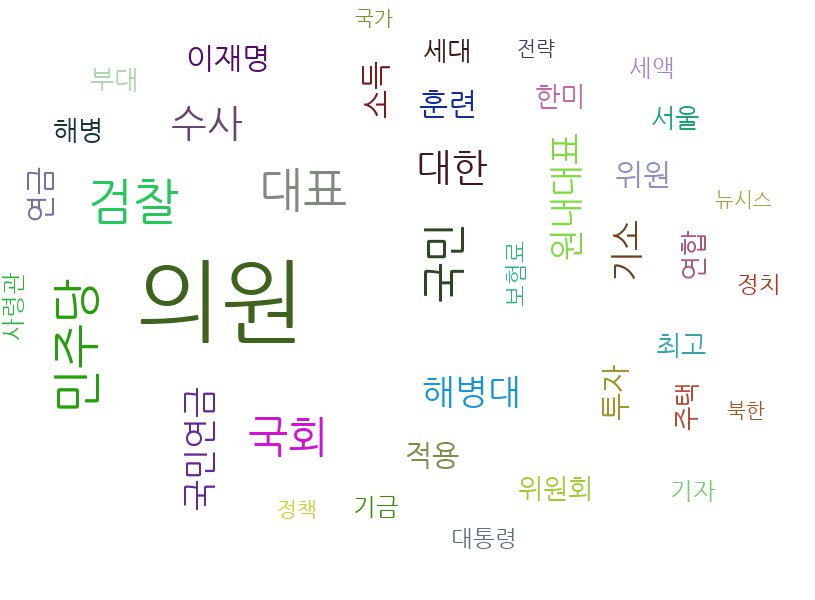

In [13]:
# 생성한 이미지를 주피터 노트북상에서 출력합니다.
from IPython.display import Image
Image(filename='wordcloud.jpg')